### MLP Model 1 (100-256-256-100-1) using STFT Dataset

In [3]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from tensorflow.keras import regularizers as reg

import tensorflow as tf
from tensorflow import keras
import pickle

ModuleNotFoundError: No module named 'cv2'

In [7]:
# Importing the Training data from pickle file 
pickle_in = open("X_train_T2.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_T2.pickle","rb")
y_train = pickle.load(pickle_in)

In [8]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)

X_train : (4431, 100)
y_train : (4431,)


In [9]:
X_train=X_train.replace([np.inf, -np.inf, np.nan], 0)

In [4]:
#Data Normalization 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [10]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(100, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
#NN_model.add(Dense(2000,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
#NN_model.add(Dense(1010,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
#NN_model.add(Dropout(0.5))
NN_model.add(Dense(256,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
NN_model.add(Dense(256,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
NN_model.add(Dense(100,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
#NN_model.add(Dropout(0.5))
# The Output Layer :
NN_model.add(Dense(1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='linear'))

# Compile the network :
#sgd = SGD(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
NN_model.summary()
early_stopping_monitor = EarlyStopping(patience=10)
callbacks_list = [early_stopping_monitor]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 127,549
Trainable params: 127,549
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Model Fit 
NN_model.fit(X_train, y_train, epochs=250, batch_size=1, validation_split = 0.05 , callbacks=callbacks_list )

Epoch 1/250
4209/4209 [==============================] - 5s 1ms/step - loss: 11112598.0000 - mean_absolute_error: 11112591.0000 - val_loss: 8829989.0000 - val_mean_absolute_error: 8829976.0000
Epoch 2/250
4209/4209 [==============================] - 5s 1ms/step - loss: 8056738.5000 - mean_absolute_error: 8056721.5000 - val_loss: 7852249.0000 - val_mean_absolute_error: 7852227.5000
Epoch 3/250
4209/4209 [==============================] - 5s 1ms/step - loss: 7072783.0000 - mean_absolute_error: 7072762.5000 - val_loss: 8214115.5000 - val_mean_absolute_error: 8214088.0000
Epoch 4/250
4209/4209 [==============================] - 5s 1ms/step - loss: 6560636.5000 - mean_absolute_error: 6560612.0000 - val_loss: 6413601.0000 - val_mean_absolute_error: 6413574.5000
Epoch 5/250
4209/4209 [==============================] - 5s 1ms/step - loss: 6122660.5000 - mean_absolute_error: 6122626.5000 - val_loss: 5601245.5000 - val_mean_absolute_error: 5601217.0000
Epoch 6/250
4209/4209 [====================

Epoch 44/250
4209/4209 [==============================] - 5s 1ms/step - loss: 2631787.2500 - mean_absolute_error: 2631658.7500 - val_loss: 3194028.5000 - val_mean_absolute_error: 3193904.2500
Epoch 45/250
4209/4209 [==============================] - 6s 1ms/step - loss: 2616549.0000 - mean_absolute_error: 2616420.2500 - val_loss: 3367790.2500 - val_mean_absolute_error: 3367663.0000
Epoch 46/250
4209/4209 [==============================] - 6s 1ms/step - loss: 2609582.7500 - mean_absolute_error: 2609456.5000 - val_loss: 3134611.5000 - val_mean_absolute_error: 3134482.5000
Epoch 47/250
4209/4209 [==============================] - 6s 1ms/step - loss: 2585200.5000 - mean_absolute_error: 2585069.2500 - val_loss: 3604167.0000 - val_mean_absolute_error: 3604036.0000
Epoch 48/250
4209/4209 [==============================] - 6s 1ms/step - loss: 2553772.7500 - mean_absolute_error: 2553635.7500 - val_loss: 2952612.2500 - val_mean_absolute_error: 2952478.5000
Epoch 49/250
4209/4209 [================

Epoch 87/250
4209/4209 [==============================] - 6s 1ms/step - loss: 1961932.7500 - mean_absolute_error: 1961713.5000 - val_loss: 2820173.7500 - val_mean_absolute_error: 2819953.7500
Epoch 88/250
4209/4209 [==============================] - 6s 1ms/step - loss: 1952251.1250 - mean_absolute_error: 1952030.1250 - val_loss: 2772266.5000 - val_mean_absolute_error: 2772045.2500
Epoch 89/250
4209/4209 [==============================] - 5s 1ms/step - loss: 1928409.1250 - mean_absolute_error: 1928191.7500 - val_loss: 2608184.0000 - val_mean_absolute_error: 2607960.2500
Epoch 90/250
4209/4209 [==============================] - 6s 1ms/step - loss: 1928296.5000 - mean_absolute_error: 1928069.1250 - val_loss: 2718155.2500 - val_mean_absolute_error: 2717928.2500
Epoch 91/250
4209/4209 [==============================] - 6s 2ms/step - loss: 1893526.1250 - mean_absolute_error: 1893296.5000 - val_loss: 2707421.7500 - val_mean_absolute_error: 2707193.0000
Epoch 92/250
4209/4209 [================

In [26]:
#Saving the model for Ensembling
filename = 'model_F2T2.h5'
NN_model.save(filename)

In [12]:
def plotfig (ypred, yactual, strtitle, y_max):
    plt.scatter(ypred, yactual.values.ravel())
    plt.title(strtitle)
    plt.plot([(0, 0), (y_max, y_max)], [(0, 0), (y_max, y_max)])
    plt.xlim(0, y_max)
    plt.ylim(0, y_max)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

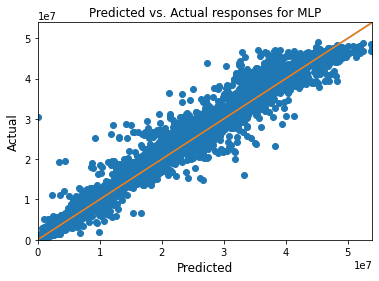

In [13]:
#Best fit line for Training data 
plotfig(NN_model.predict(X_train), y_train, 'Predicted vs. Actual responses for MLP', max(y_train) + 0.1*max(y_train))

In [14]:
#Importing the test data 
pickle_in = open("X_test_T2.pickle","rb")
X_test = pickle.load(pickle_in)

In [15]:
predictions = NN_model.predict(X_test)
print(predictions)

[[20248008.]
 [38431216.]
 [21283110.]
 ...
 [16766103.]
 [33594492.]
 [31018890.]]


In [25]:
predictions.shape

(4520, 1)

In [27]:
testsub =  pd.read_csv('C:/Datasets/predict-volcanic-eruptions-ingv-oe/sample_submission.csv')

In [24]:
#Creating Submission file to kaggle 
submission = pd.DataFrame()
submission['segment_id'] = testsub['segment_id']
submission['time_to_eruption'] = predictions
submission.to_csv('submission_MLP_121320_Best.csv', header=True, index=False)